In [1]:
# Basic libraries
import numpy as np
import tensorflow as tf
# LSTM-autoencoder
from LSTMAutoencoder import *
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler


In [2]:
tf.reset_default_graph()
tf.set_random_seed(2016)
np.random.seed(2016)

In [3]:
# Constants
batch_num = 120
hidden_num = 15
step_num = 15
elem_num = 1
iteration = 300000

In [4]:
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataframe.values.astype('float32'))
dataset = dataframe.values.astype('float32')

data=np.zeros((batch_num,step_num,1))
for b in range(batch_num):
    data[b]=dataset[b:b+step_num]
    
# (batch_num, 8, 1)
 
print(data.shape)
    

(120, 15, 1)


In [5]:
# placeholder list
p_input = tf.placeholder(tf.float32, shape=(batch_num, step_num, elem_num))
p_inputs = [tf.squeeze(t, [1]) for t in tf.split(p_input, step_num, 1)]

cell = tf.nn.rnn_cell.LSTMCell(hidden_num, use_peepholes=True)
ae = LSTMAutoencoder(hidden_num, p_inputs, cell=cell, decode_without_input=True)

Instructions for updating:
Use the retry module or similar alternatives.


In [6]:
# Encapsuler ça dans une fonction au format Train

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(iteration):
        iteration_data = np.copy(data)
        np.random.shuffle(iteration_data)
        (loss_val, _) = sess.run([ae.loss, ae.train], {p_input: iteration_data})
        if i%(iteration/20) == 0:
            print('iter %d:' % (i), loss_val)

    (input_, output_) = sess.run([ae.input_, ae.output_], {p_input: data})
    print('train result :')
    print('input : ', input_[0, :, 0])
    print('output :', output_[0, :, 0])
    print('diff :  ', output_[0, :, 0]-input_[0, :, 0])

iter 0: 79308.96
iter 15000: 9502.611
iter 30000: 1610.925
iter 45000: 728.1103
iter 60000: 354.25897
iter 75000: 411.9959
iter 90000: 238.49461
iter 105000: 213.62068
iter 120000: 158.001
iter 135000: 151.26598
iter 150000: 204.61142
iter 165000: 182.72424
iter 180000: 153.5028
iter 195000: 162.46733
iter 210000: 142.52141
iter 225000: 130.64822
iter 240000: 229.75188
iter 255000: 222.51315
iter 270000: 181.55681
iter 285000: 150.9659
train result :
input :  [112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141.]
output : [112.326256 116.40621  120.93492  127.12361  135.381    140.4384
 138.19987  130.06479  124.33877  125.552864 132.16872  123.54009
 127.28896  128.90149  139.59787 ]
diff :   [  0.3262558  -1.5937881 -11.065079   -1.8763885  14.380997    5.4384003
  -9.800125  -17.935211  -11.661232    6.552864   28.168716    5.5400925
  12.288963    2.9014893  -1.4021301]


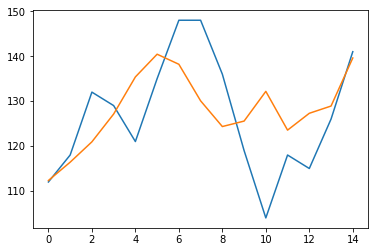

In [9]:
import matplotlib.pyplot as plt
plt.plot(input_[0, :, 0])
plt.plot(output_[0, :, 0])
plt.show()

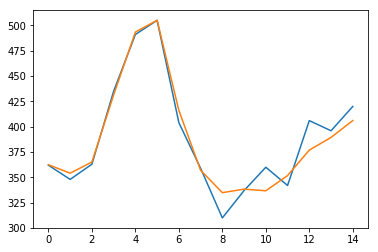

In [47]:
z=-10
import matplotlib.pyplot as plt
plt.plot(input_[z, :, 0])
plt.plot(output_[z, :, 0])
plt.show()